# Modèle de réseau neuronale

C'est plus simple de faire le modèle sur le notebook pour pouvoir analyser chaque étape avec précision

In [12]:
#Imports

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import seaborn as sns #On ne sait jamais que ça serve
import pandas as pd #Même argument


In [2]:
#from alexnet_pytorch import AlexNet # ça fait planter matplotlib
#A_model = AlexNet.from_pretrained('alexnet', num_classes=10)

In [3]:
#Insert des données

In [4]:
#Idéalement, il faudrait ajouter les données batch par batch pour ne pas trop faire souffrir la ram

In [5]:
labels_csv = pd.read_csv('DATA\\labels.csv')

In [6]:
for line in labels_csv.values:
    label = line[0]
    name = line[1]
    #print(f"Le label est '{label}' et le nom de la vidéo : '{name}'")

In [7]:
X_link = []
y = []
for label,name in labels_csv.values:
    X_link.append(name)
    y.append(label)

In [8]:
#a_vid.get(cv2.CAP_PROP_POS_MSEC) #donne la position dans la vidéo en ms, on est à 25 fps donc chaque image est espacée de 40ms


### function: insert imgs/videos

In [9]:
def get_imgs_from_path(path,fps = -1):
    '''
    Retourne une liste d'images. La liste d'image a le nombre de fps voulu
    '''
    cap = cv2.VideoCapture(path)
    fps_actu = cap.get(cv2.CAP_PROP_FPS)
    if fps <= -1: fps = fps_actu #Je peux ne pas donner de fps et ça va prendre le nombre d'fps initial
    ecart_voulu = int(1000/fps)
    ecart_initial = int(1000/fps_actu)
    imgs = []
    
    
    while(cap.isOpened()):
        ret, frame = cap.read()

        if ret: #Sinon ça plante quand il n'y a plus d'images
            
            #Bonne couleur
            frame_RGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            
            #Récupère seulement certaines images
            t_ms = cap.get(cv2.CAP_PROP_POS_MSEC)
            modulo = t_ms % ecart_voulu
            if modulo < ecart_initial:
                #Isoler les images
                imgs.append(frame_RGB)
            
        else: #Va jusqu'au bout de la vidéo
            break
    else:
        print("Le fichier n'a pas pu être ouvert")
    cap.release()
    
    return imgs

In [10]:
def get_mov_imgs_from_path(path,fps = -1,color = 'gray'):
    '''
    Retourne une liste d'images. La liste d'image a le nombre de fps voulu
    reprend que le mouvement
    '''
    cap = cv2.VideoCapture(path)
    fps_actu = cap.get(cv2.CAP_PROP_FPS)
    print(f"Traitement de la video n° {path}",end="\r")
    if fps <= -1: fps = fps_actu #Je peux ne pas donner de fps et ça va prendre le nombre d'fps initial
    ecart_voulu = int(1000/fps)
    ecart_initial = int(1000/fps_actu)
    imgs = []
    
    ret, frame = cap.read()
    
    while(cap.isOpened()):
        prev = frame
        ret, frame = cap.read()

        if ret: #Sinon ça plante quand il n'y a plus d'images
            #Récupère seulement certaines images
            t_ms = cap.get(cv2.CAP_PROP_POS_MSEC)
            modulo = t_ms % ecart_voulu
            if modulo < ecart_initial:
                #Isoler les images
                
                diff = cv2.absdiff(frame,prev)  
                if color == 'gray':
                    diff_gray = cv2.cvtColor(diff,cv2.COLOR_BGR2GRAY)
                elif color == 'rgb':
                    diff_gray = diff
                #Normalisation foireuse pour avoir une belle image
                max_ = np.max(diff_gray)
                ratio = 255.0 / max_
                diff_gray = diff_gray * ratio
                
                
                #_,diff_thresh = cv2.threshold(diff_gray,15,255,cv2.THRESH_BINARY)
                #diff_thresh, c'est juste le mouvement Ici on isole l'image en couleur
                #frame_rgb = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
                #J'isole le mouvement de l'image initiale pour avoir une sortie en couleur
                #mov = cv2.bitwise_and(frame_rgb,frame_rgb,mask = diff_thresh)
                
                #On va travailler avec des images en nuance de gris, c'est bcp plus simple
                imgs.append(diff_gray)
            
        else: #Va jusqu'au bout de la vidéo
            break
    else:
        print("Le fichier n'a pas pu être ouvert")
    cap.release()
    
    return imgs

In [11]:
mov_imgs = get_mov_imgs_from_path('DATA\\Videos\\video_101.avi',-1)
#mov_imgs = resize_imgs(mov_imgs,(160,120))

(480, 640)


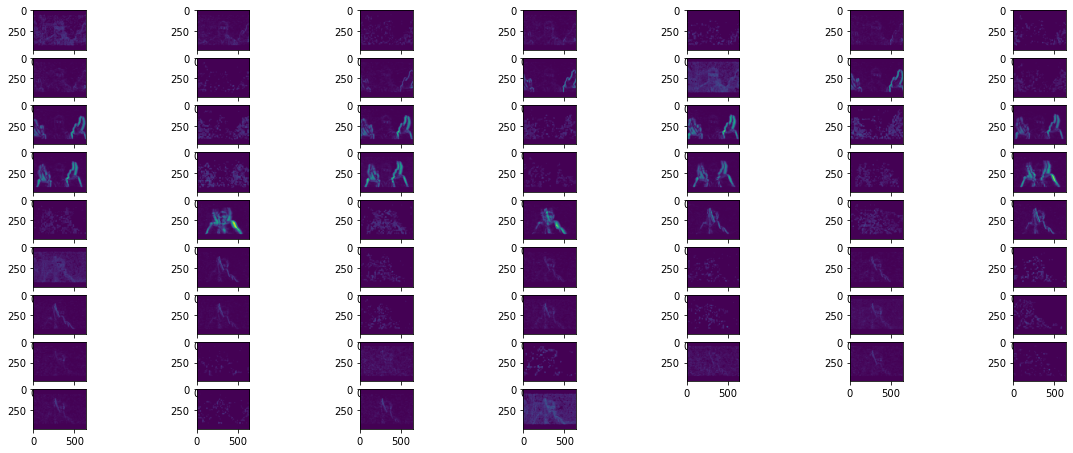

In [12]:
plt.figure(figsize=(20,60)) #(20,60) pour des images en (120,160). (20,180) pour des images en (480,640)
print(mov_imgs[1].shape)
columns = 7
for i, img in enumerate(mov_imgs):
    plt.subplot(int(len(img) / columns + 1), columns, i + 1)
    plt.imshow(img)

In [13]:
len(mov_imgs)

60

In [14]:
labels_file = pd.read_csv('DATA\\labels_list.csv')
labels = labels_file.values

In [15]:
print(len(labels))

13


In [16]:
label_num = 10
if (label_num >= len(labels)):
    label_num = 0
label = labels[label_num][0]
print(label)

Ouvrir un livre avec le poing ferme main D


### function: resize

In [17]:
def resize_imgs(imgs,nsize):
    '''
    Change la taille de l'image.
    Le premier élément de nsize est la longueur (width), le deuxième la hauteur (height)
    '''
   # new_imgs = []
  #  for img in imgs:
 #       new_imgs.append(cv2.resize(img, dsize=nsize, interpolation=cv2.INTER_CUBIC))
#    return new_imgs
    return [cv2.resize(img, dsize=nsize, interpolation=cv2.INTER_CUBIC) for img in imgs]

In [18]:
#plt.imshow(imgs[2])

In [19]:
def reduce_fps(imgs,ratio = 6):
    '''
    imgs est une liste d'images
    1/ratio est le nombre d'images qu'on garde
    '''
    new_imgs = []
    for i,img in enumerate(imgs):
        if i % ratio == 0:
            new_imgs.append(img)
    return new_imgs    

#### Test TfRecord

In [20]:
#from video2tfrecord import convert_videos_to_tfrecord

In [21]:
#convert_videos_to_tfrecord(source_path = "test_data\\Videos",destination_path = "test_data\\tfRecords",
#                            n_videos_in_record = 1,n_frames_per_video = "all",file_suffix = "*.avi",
#                          dense_optical_flow=True, width = 640, height=480,
#                              color_depth="uint8", video_filenames=None)
#Broken

## Real Insert

In [22]:
#Récupère toutes les vidéos, prend slmt z fps et les resize
import time
folder_path = 'Data\\Videos\\'
fps = 10
size = (160,120) # La shape initial est (480, 640, 3), Il faut inverser le sens de with et height.
#Size demi par rapport à initial
nb_images_max = 100 #Prend les x premières images

start = time.time()
X = []
for i,name in enumerate(X_link):
    file_path = folder_path + name
    imgs_of_video = get_mov_imgs_from_path(file_path,fps,'gray')
    resized_imgs = resize_imgs(imgs_of_video, size)
    X.append(resized_imgs)
    if i >= nb_images_max:
        break
end = time.time()
y = y[:len(X)]

print(f"ça a prit {end-start} secondes",end=" "*15)

ça a prit 20.660812854766846 secondes               

In [23]:
print(f"Il y a {len(X)} vidéos et {len(y)} labels") #Petite vérification
print(X[0][0].shape)

Il y a 101 vidéos et 101 labels
(120, 160)


('Ferme le poing', 'Doigts croises paumes', 'Swipe gauche main gauche', 'Doigts croises paumes', 'Explosion avec les doigts ouverts', 'Explosion avec les doigts ouverts', 'Doigts croises paumes', 'Prendre un element avec 2 doigts', 'Faire coucou', 'Swipe droit main droite', 'Ouvrir un livre avec le poing ferme main D', 'Ouvrir un livre avec le poing ferme main D', 'Ferme le poing', 'Swipe droit main gauche', 'Swipe droit main gauche', 'Ouvre le poing', 'Prendre un element avec 2 doigts', 'Explosion avec les doigts ouverts', 'Ferme le poing', 'Ferme le poing', 'Swipe droit main gauche', 'Swipe gauche main droite', 'Ferme le poing', 'Ferme le poing', 'Clap', 'Ferme le poing', 'Ouvre le poing', 'Swipe gauche main gauche', 'Prendre un element avec 2 doigts', 'Explosion avec les doigts ouverts', 'Ferme le poing', 'Prendre un element avec 2 doigts', 'Prendre un element avec 2 doigts', 'Ouvre le poing', 'Faire coucou', 'Ferme le poing', 'Ferme le poing', 'Ouvrir un livre avec le poing ferme m

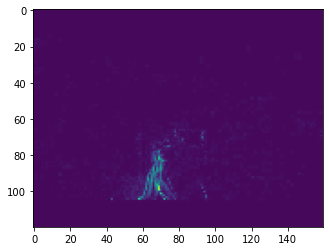

In [24]:
#Melanger les videos associés aux labels
import random
both = list(zip(X,y))
random.shuffle(both)
X,y = zip(*both)
print(y)
plt.imshow(X[-1][10])
nb_classes = len(set(y))
print(nb_classes)

In [25]:
#[f"{len(vid)} , {e}" for e,vid in enumerate(X)] # Toutes les vidéos n'ont pas le même nombre de frame


(120, 160)
label = Doigts croises paumes


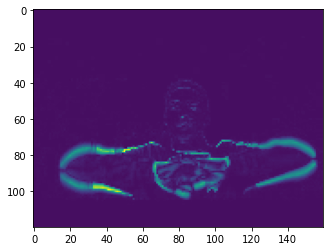

In [26]:
num_vid = 6
plt.imshow(X[num_vid][11])
print(X[num_vid][10].shape)
print(f"label = {y[num_vid]}")

C'est ok pour l'import des vidéos et le traitement de celles-ci
On prend un certain nombre de FPS, leur taille est réduite et elles sont mises dans une grande liste 
dont l'index correspond à l'index du label dans y

24


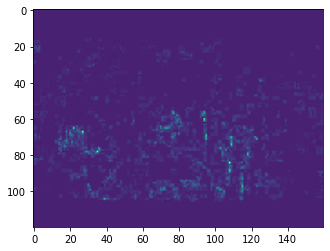

In [27]:
print(len(X[0]))
plt.imshow(X[5][20])

## Modele fabrication

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import  Dense, Conv3D, BatchNormalization,MaxPooling3D, Dropout, LSTM

In [29]:
sample_shape = (24,120,160,1) #width = 160, height = 120, nframes = 24, 3 channels si on est en RGB (si on est en gris on sait pas)
model = Sequential()
model.add(Conv3D(32, strides =(1,1,1), padding="same", kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=sample_shape,data_format='channels_first'))
#model.add(Conv3D(32, strides =(1,1,1), padding="same", kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=sample_shape,data_format='channels_last'))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization(center=True, scale=True))
model.add(Conv3D(32, strides=(1,1,1), padding="same", kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization(center=True, scale=True))
model.add(MaxPooling3D(pool_size=(3, 3, 3)))
model.add(Dropout(0.2))

model.add(Conv3D(64, strides=(1,1,1), padding="same", kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization(center=True, scale=True))
model.add(Conv3D(64, strides=(1,1,1), padding="same", kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization(center=True, scale=True))
model.add(MaxPooling3D(pool_size=(3, 3, 3)))
model.add(Dropout(0.2))

model.add(Conv3D(64, strides=(1,1,1), padding="same", kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization(center=True, scale=True))
model.add(Conv3D(64, strides=(1,1,1), padding="same", kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization(center=True, scale=True))
model.add(MaxPooling3D(pool_size=(3, 3, 3)))
model.add(Dropout(0.2))

model.add(Conv3D(128, strides=(1,1,1), padding="same", kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization(center=True, scale=True))

#model.add(Dense(1, activation='relu', kernel_initializer='he_uniform'))
#model.add(MaxPooling3D(pool_size=(1, 3, 3)))
#model.add(layers.Reshape((128, 5120),input_shape = (1,128,4,5,256)))
#model.add(layers.Reshape((128, 640),input_shape = (1,128,4,5,32)))
model.add(layers.Reshape((1,640),input_shape = (1,4,5,32)))
#model.add(layers.Flatten())

#LSTM
#model.add(Embedding(num_distinct_words, embedding_output_dims, input_length=max_sequence_length))
model.add(LSTM(units = 128,activation="tanh", recurrent_activation="sigmoid",return_sequences = False))
#[None, 128, 4, 5, 256]


#softmax
model.add(Dense(11, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 32, 120, 160, 1)   20768     
_________________________________________________________________
dense (Dense)                (None, 32, 120, 160, 256) 512       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 120, 160, 256) 1024      
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 32, 120, 160, 32)  221216    
_________________________________________________________________
dense_1 (Dense)              (None, 32, 120, 160, 256) 8448      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 120, 160, 256) 1024      
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 10, 40, 53, 256)   0

In [52]:
len(X[0])

24

In [64]:
#ON A PAS NORMALISE X
X_np = np.array(X)

ValueError: maximum supported dimension for an ndarray is 32, found 101

In [44]:
y_np = np.array(y)

In [45]:
y_np = np.array([1,2,3,4,5,6,7,8,9,10,11]) #Il faut que les labels soit des numériques
y_np

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [63]:
X_np.shape

(101,)

In [47]:
X_np = X_np.reshape(101,24,120,160,1)

ValueError: cannot reshape array of size 101 into shape (101,24,120,160,1)

In [48]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
model.fit(X_np,y_np)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

In [50]:
X_np.shape


(101,)

In [422]:
nb_classes = 1

sample_shape = (24,120, 160, 1)
model_stolen = Sequential()
model_stolen.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=sample_shape))
model_stolen.add(MaxPooling3D(pool_size=(2, 2, 2)))
model_stolen.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
model_stolen.add(MaxPooling3D(pool_size=(2, 2, 2)))
model_stolen.add(layers.Flatten())
model_stolen.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model_stolen.add(Dense(nb_classes, activation='softmax'))

model_stolen.summary()

Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_366 (Conv3D)          (None, 22, 118, 158, 32)  896       
_________________________________________________________________
max_pooling3d_174 (MaxPoolin (None, 11, 59, 79, 32)    0         
_________________________________________________________________
conv3d_367 (Conv3D)          (None, 9, 57, 77, 64)     55360     
_________________________________________________________________
max_pooling3d_175 (MaxPoolin (None, 4, 28, 38, 64)     0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 272384)            0         
_________________________________________________________________
dense_375 (Dense)            (None, 256)               69730560  
_________________________________________________________________
dense_376 (Dense)            (None, 1)               

In [383]:
X_np[1][1].shape

(120, 160)

In [396]:
def array_to_color(array, cmap="Oranges"):
  s_m = plt.cm.ScalarMappable(cmap=cmap)
  #return s_m.to_rgba(array)[:,:-1]
  return s_m.to_rgba(array)[:,:]

def rgb_data_transform(data):
  data_t = []
  for i in range(data.shape[0]):
        data_temp = []
        for j in range(data[i].shape[0]):
            data_temp.append(array_to_color(data[i][j]).reshape(120, 160, 1))
        data_t.append(data_temp)
  return np.asarray(data_t, dtype=np.float32)

In [433]:
y_np.shape

(8,)

In [465]:
print(X_np.shape)
print(y_np.shape)

(11, 24, 120, 160, 1)
(11,)


In [464]:
learning_rate = 0.01
# Compile the model
model_stolen.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

# Fit data to model
history = model_stolen.fit(X_np, y_np,
            batch_size=1,
            epochs=1,
            verbose=1,
            validation_split=0.2)

8/8 [==============================] - 26s 3s/step - loss: 0.0000e+00 - accuracy: 0.1250 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


## Model Training

## Modele test 

